1.  Загрузить данные из файла “insurance.csv”

In [15]:
import pandas as pd

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


2. С помощью метода describe() посмотреть статистику по данным. Сделать выводы.

In [16]:
data_statistics = data.describe()

data_statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


3.  Построить гистограммы для числовых показателей. Сделать выводы

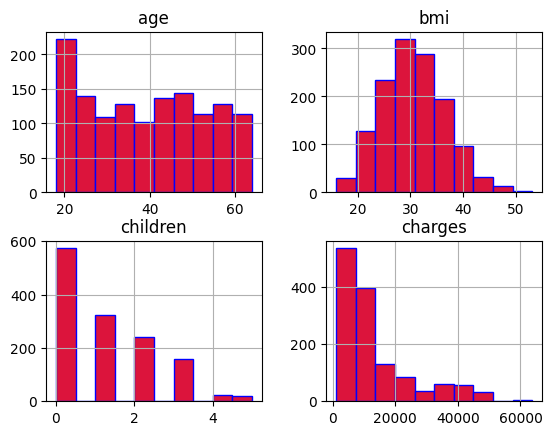

In [17]:
import matplotlib.pyplot as plt

data.hist(color='crimson', edgecolor='blue')
plt.show()

4. Найти меры центральной тенденции и меры разброса для индекса массы 
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на 
гистограммах  (3  вертикальные  линии).  Добавить  легенду  на  графики. 
Сделать выводы.

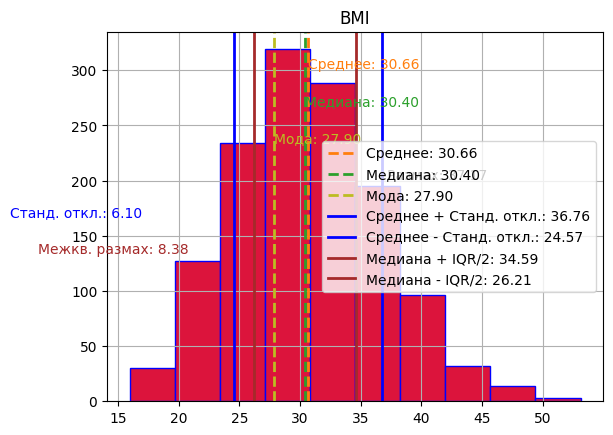

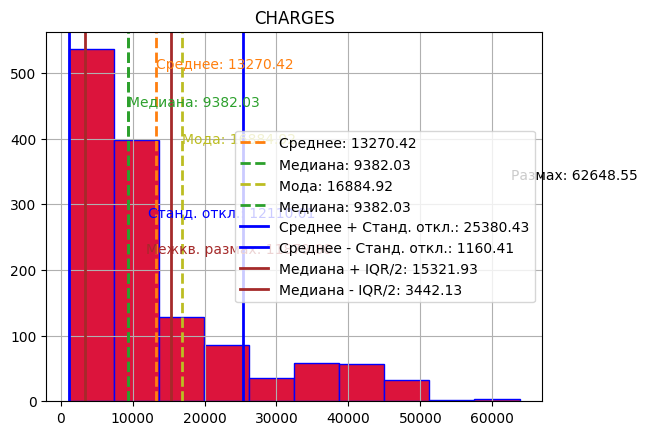

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts


sp_bmi = np.array([data.bmi])
sp_charges=np.array([data.charges])

#Центральные тенденции
mean_bmi = np.mean(sp_bmi)
moda_bmi=sts.mode(sp_bmi)
med_bmi=np.median(sp_bmi)

mean_charges = np.mean(sp_charges)
moda_charges=sts.mode(sp_charges)
med_charges=np.median(sp_charges)

#Размах
range_bmi = np.max(sp_bmi) - np.min(sp_bmi)
range_charges = np.max(sp_charges) - np.min(sp_charges)

#Стандартное отклонение
std_bmi=data['bmi'].std()
std_charges=data['charges'].std()

#Межквартальный размах
iqr_bmi=sts.iqr(data['bmi'], interpolation='midpoint')
iqr_charges=sts.iqr(data['charges'], interpolation='midpoint')


data.bmi.hist(color='crimson', edgecolor='blue')
plt.text(mean_bmi, plt.ylim()[1]*0.9, f'Среднее: {mean_bmi:.2f}', color='C1')
plt.axvline(mean_bmi, color='C1', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_bmi:.2f}')

plt.text(med_bmi, plt.ylim()[1]*0.8, f'Медиана: {med_bmi:.2f}', color='C2')
plt.axvline(med_bmi, color='C2', linestyle='dashed', linewidth=2, label=f'Медиана: {med_bmi:.2f}')

plt.text(moda_bmi.mode[0], plt.ylim()[1]*0.7, f'Мода: {moda_bmi.mode[0]:.2f}', color='C8')
plt.axvline(moda_bmi.mode[0], color='C8', linestyle='dashed', linewidth=2, label=f'Мода: {moda_bmi.mode[0]:.2f}')

plt.text(range_bmi, plt.ylim()[1]*0.6, f'Размах: {range_bmi:.2f}', color='black')
# plt.axvline(range_bmi, color='black', linestyle='dashdot', linewidth=2, label=f'Размах: {range_bmi:.2f}')

plt.text(std_bmi, plt.ylim()[1]*0.5, f'Станд. откл.: {std_bmi:.2f}', color='b')
# plt.axvline(std_bmi, color='b', linestyle='dashdot', linewidth=2, label=f'Станд. откл.: {std_bmi:.2f}')

plt.text(iqr_bmi, plt.ylim()[1]*0.4, f'Межкв. размах: {iqr_bmi:.2f}', color='brown')
# plt.axvline(iqr_bmi, color='brown', linestyle='dashdot', linewidth=2, label=f'Межкв. размах: {iqr_bmi:.2f}')

plt.axvline(mean_bmi + std_bmi, color='b', linestyle='solid', linewidth=2, label=f'Среднее + Станд. откл.: {mean_bmi + std_bmi:.2f}')
plt.axvline(mean_bmi - std_bmi, color='b', linestyle='solid', linewidth=2, label=f'Среднее - Станд. откл.: {mean_bmi - std_bmi:.2f}')

plt.axvline(med_bmi + iqr_bmi / 2, color='brown', linestyle='solid', linewidth=2, label=f'Медиана + IQR/2: {med_bmi + iqr_bmi / 2:.2f}')
plt.axvline(med_bmi - iqr_bmi / 2, color='brown', linestyle='solid', linewidth=2, label=f'Медиана - IQR/2: {med_bmi - iqr_bmi / 2:.2f}')



plt.title("BMI")
plt.legend()
plt.show()


data.charges.hist(color='crimson', edgecolor='blue')
plt.text(mean_charges, plt.ylim()[1]*0.9, f'Среднее: {mean_charges:.2f}', color='C1')
plt.axvline(mean_charges, color='C1', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_charges:.2f}')

plt.text(med_charges, plt.ylim()[1]*0.8, f'Медиана: {med_charges:.2f}', color='C2')
plt.axvline(med_charges, color='C2', linestyle='dashed', linewidth=2, label=f'Медиана: {med_charges:.2f}')

plt.text(moda_charges.mode[0], plt.ylim()[1]*0.7, f'Мода: {moda_charges.mode[0]:.2f}', color='C8')
plt.axvline(moda_charges.mode[0], color='C8', linestyle='dashed', linewidth=2, label=f'Мода: {moda_charges.mode[0]:.2f}')

plt.text(range_charges, plt.ylim()[1]*0.6, f'Размах: {range_charges:.2f}', color='black')
# plt.axvline(range_charges, color='black', linestyle='dashdot', linewidth=2, label=f'Размах: {range_charges:.2f}')

plt.text(std_charges, plt.ylim()[1]*0.5, f'Станд. откл.: {std_charges:.2f}', color='b')
# plt.axvline(std_charges, color='b', linestyle='dashdot', linewidth=2, label=f'Станд. откл.: {std_charges:.2f}')

plt.text(iqr_charges, plt.ylim()[1]*0.4, f'Межкв. размах: {iqr_charges:.2f}', color='brown')
# plt.axvline(iqr_charges, color='brown', linestyle='dashdot', linewidth=2, label=f'Межкв. размах: {iqr_charges:.2f}')


plt.axvline(med_charges, color='C2', linestyle='dashed', linewidth=2, label=f'Медиана: {med_charges:.2f}')


plt.axvline(mean_charges + std_charges, color='b', linestyle='solid', linewidth=2, label=f'Среднее + Станд. откл.: {mean_charges + std_charges:.2f}')
plt.axvline(mean_charges - std_charges, color='b', linestyle='solid', linewidth=2, label=f'Среднее - Станд. откл.: {mean_charges - std_charges:.2f}')

# Медиана и межквартильный размах
plt.axvline(med_charges + iqr_charges / 2, color='brown', linestyle='solid', linewidth=2, label=f'Медиана + IQR/2: {med_charges + iqr_charges / 2:.2f}')
plt.axvline(med_charges - iqr_charges / 2, color='brown', linestyle='solid', linewidth=2, label=f'Медиана - IQR/2: {med_charges - iqr_charges / 2:.2f}')


plt.title("CHARGES")
plt.legend()
plt.show()



5. Построить box-plot для числовых показателей. Названия графиков должны 
соответствовать названиям признаков. Сделать выводы. 

C:\Users\Ева\AppData\Local\Temp\ipykernel_15264\3519361638.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['age'], data['bmi'], data['children'], data['charges']],


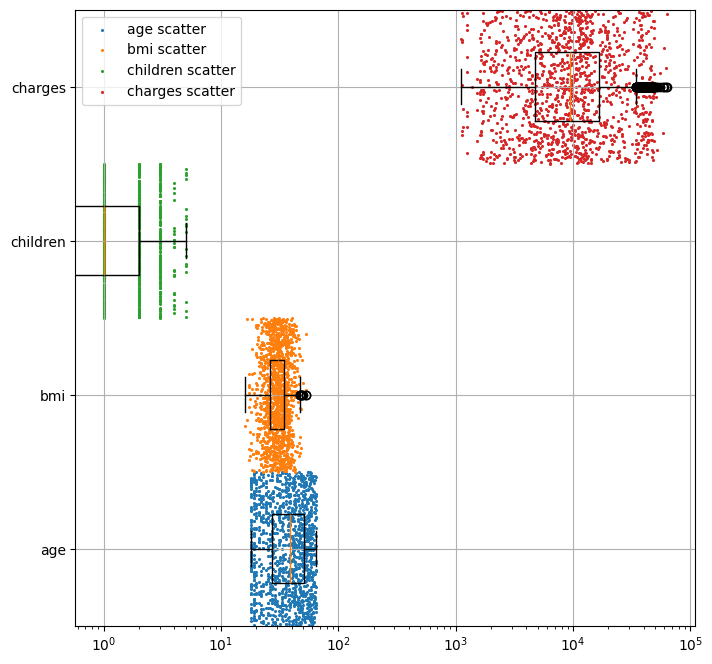

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(8,8))

y_age = np.random.uniform(0.5, 1.5, size=len(data['age']))       
y_bmi = np.random.uniform(1.5, 2.5, size=len(data['bmi']))       
y_children = np.random.uniform(2.5, 3.5, size=len(data['children'])) 
y_charges = np.random.uniform(3.5, 4.5, size=len(data['charges'])) 

plt.boxplot([data['age'], data['bmi'], data['children'], data['charges']],
            labels=['age', 'bmi', 'children', 'charges'], vert=False)

plt.scatter(data['age'], y_age, s=1.5, label='age scatter')
plt.scatter(data['bmi'], y_bmi, s=1.5, label='bmi scatter')
plt.scatter(data['children'], y_children, s=1.5, label='children scatter')
plt.scatter(data['charges'], y_charges, s=1.5, label='charges scatter')

plt.xscale('log')
 
plt.grid()
plt.legend()
plt.show()


6. Используя  признак  charges или  imb,  проверить,  выполняется  ли 
центральная предельная теорема. Использовать различные длины выборок 
n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти 
стандартное  отклонение  и  среднее  для полученных  распределений. 
Сделать выводы.

CHARGES


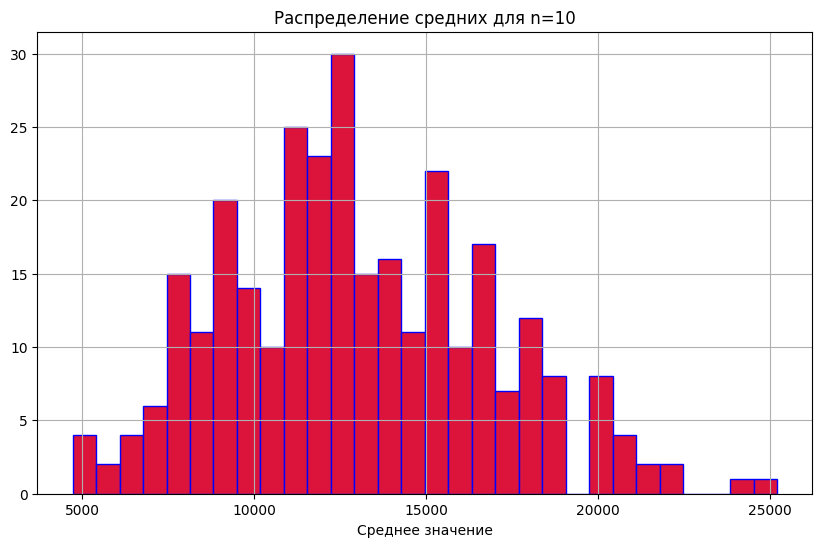

Для выборки размера n=10:
Среднее значение распределения средних: 12990.76
Стандартное отклонение распределения средних: 3806.45
----------------------------------------


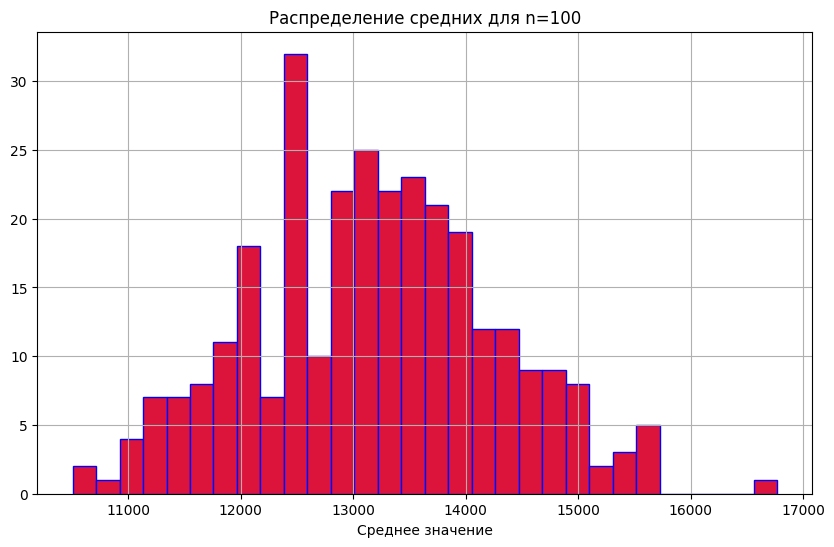

Для выборки размера n=100:
Среднее значение распределения средних: 13181.15
Стандартное отклонение распределения средних: 1089.58
----------------------------------------


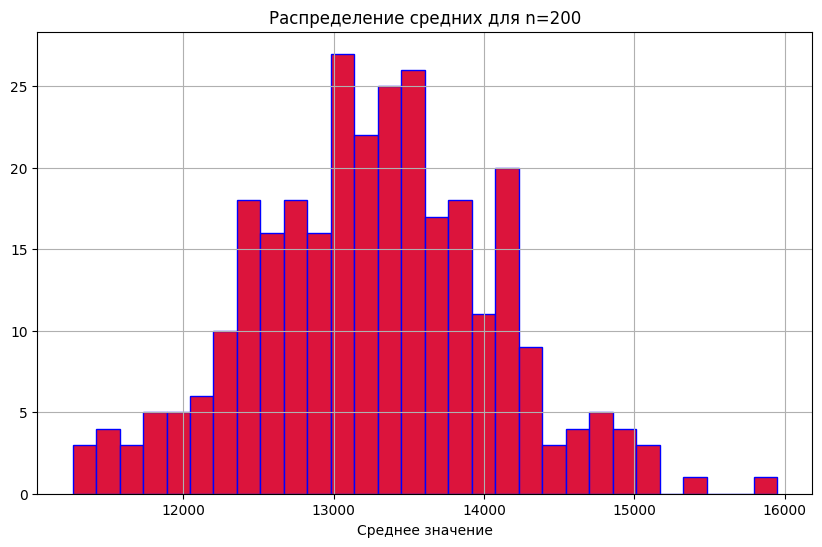

Для выборки размера n=200:
Среднее значение распределения средних: 13260.34
Стандартное отклонение распределения средних: 803.35
----------------------------------------


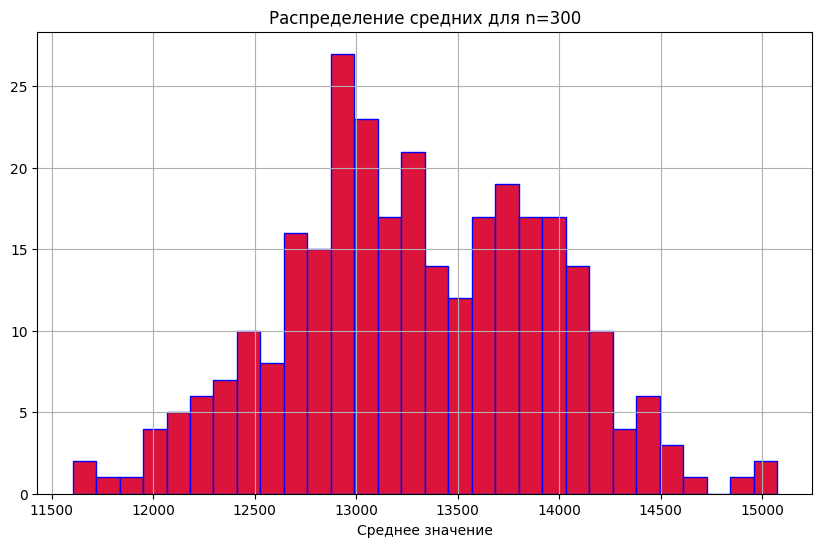

Для выборки размера n=300:
Среднее значение распределения средних: 13301.84
Стандартное отклонение распределения средних: 648.56
----------------------------------------
BMI


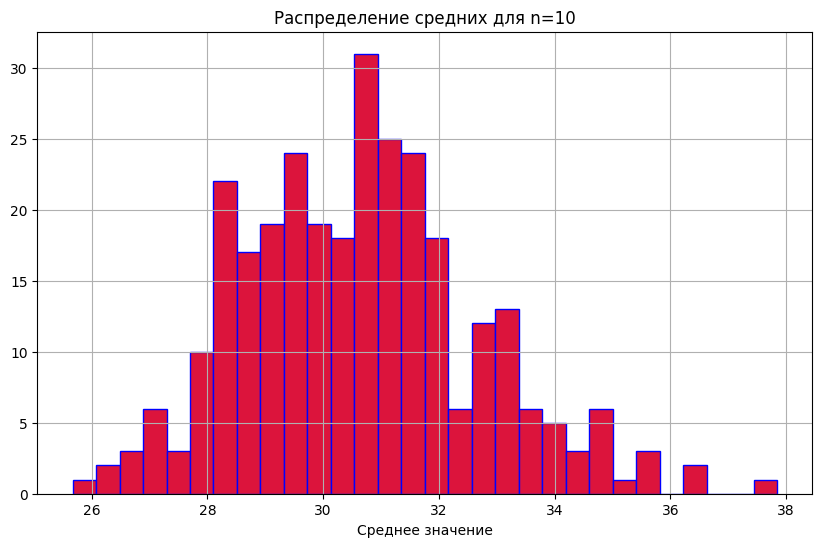

Для выборки размера n=10:
Среднее значение распределения средних: 30.63
Стандартное отклонение распределения средних: 2.03
----------------------------------------


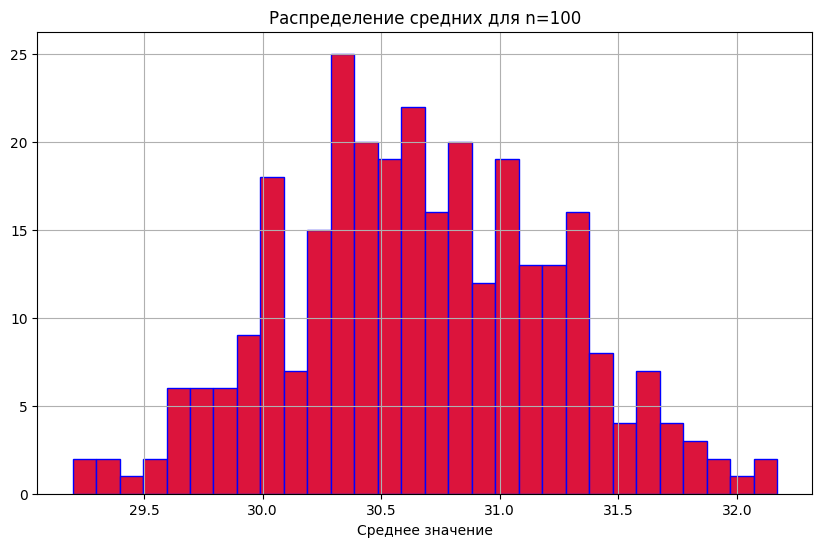

Для выборки размера n=100:
Среднее значение распределения средних: 30.67
Стандартное отклонение распределения средних: 0.57
----------------------------------------


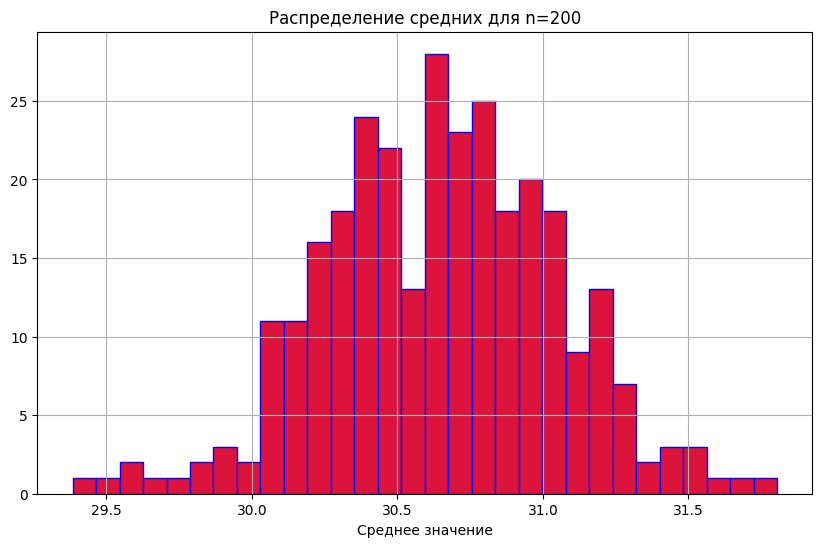

Для выборки размера n=200:
Среднее значение распределения средних: 30.65
Стандартное отклонение распределения средних: 0.40
----------------------------------------


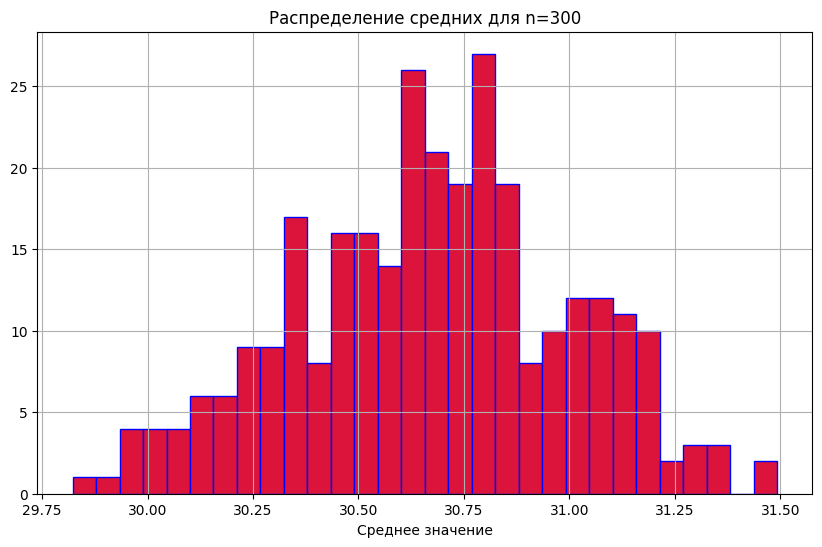

Для выборки размера n=300:
Среднее значение распределения средних: 30.67
Стандартное отклонение распределения средних: 0.32
----------------------------------------


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

data_charges = data['charges']
data_bmi = data['bmi']

def central_limit_theorem(feature, sample_sizes, num_samples=300):
    for n in sample_sizes:
        means = []
        
        for _ in range(num_samples):
            sample = feature.sample(n, replace=False)
            means.append(sample.mean())
        
        plt.figure(figsize=(10, 6))
        plt.hist(means, bins=30, color='crimson', edgecolor='blue')
        plt.title(f'Распределение средних для n={n}')
        plt.xlabel('Среднее значение')
        plt.grid(True)
        plt.show()
        
        mean_of_means = np.mean(means)
        std_of_means = np.std(means)
        
        print(f"Для выборки размера n={n}:")
        print(f"Среднее значение распределения средних: {mean_of_means:.2f}")
        print(f"Стандартное отклонение распределения средних: {std_of_means:.2f}")
        print("-" * 40)

sample_sizes = [10, 100, 200, 300]

print("CHARGES")
central_limit_theorem(data_charges, sample_sizes)
print('BMI')
central_limit_theorem(data_bmi, sample_sizes)


7. Построить  95%  и  99%  доверительный  интервал  для  среднего  значения 

In [6]:
#Для каждой выборки рассчитываем среднее значение и свой 
# доверительный  интервал,  которые  рассчитывается  по  следующей  формуле:  
# 𝑥̅±1,96 𝑆𝐸. 95 % построенных доверительных интервалов содержат истинное 
# значение среднего генеральной совокупности.

import numpy as np
import pandas as pd
from scipy import stats

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

data_charges = data['charges']
data_bmi = data['bmi']

conf1 = 0.95
conf2 = 0.99
n = len(data_charges)
mean = np.mean(data_charges) 
std_err = stats.sem(data_charges)

rezch1 = stats.t.interval(conf1, n-1, loc=mean, scale=std_err)
rezch2 = stats.t.interval(conf2, n-1, loc=mean, scale=std_err)

print(f"Среднее значение: {mean:.2f}")
print(f"95% доверительный интервал: ({rezch1[0]:.2f}, {rezch1[1]:.2f})")
print(f"99% доверительный интервал: ({rezch2[0]:.2f}, {rezch2[1]:.2f})")


n = len(data_bmi) 
mean = np.mean(data_bmi)  
std_err = stats.sem(data_bmi) 

rezbmi1 = stats.t.interval(conf1, n-1, loc=mean, scale=std_err)
rezbmi2 = stats.t.interval(conf2, n-1, loc=mean, scale=std_err)

print(f"Среднее значение: {mean:.2f}")
print(f"95% доверительный интервал: ({rezbmi1[0]:.2f}, {rezbmi1[1]:.2f})")
print(f"99% доверительный интервал: ({rezbmi2[0]:.2f}, {rezbmi2[1]:.2f})")


Среднее значение: 13270.42
95% доверительный интервал: (12620.95, 13919.89)
99% доверительный интервал: (12416.43, 14124.41)
Среднее значение: 30.66
95% доверительный интервал: (30.34, 30.99)
99% доверительный интервал: (30.23, 31.09)


8. Проверить распределения следующих признаков на нормальность: индекс массы  тела,  расходы. Сформулировать  нулевую  и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

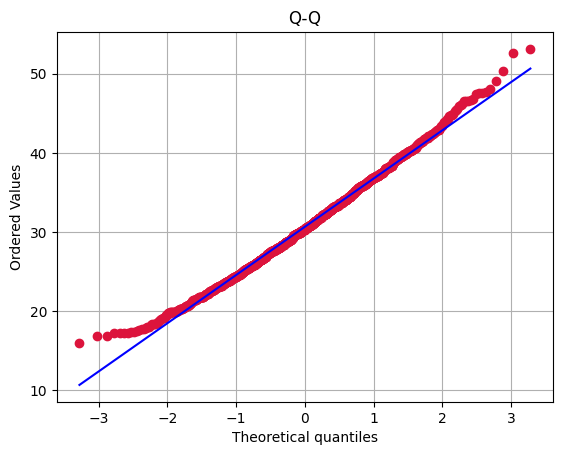

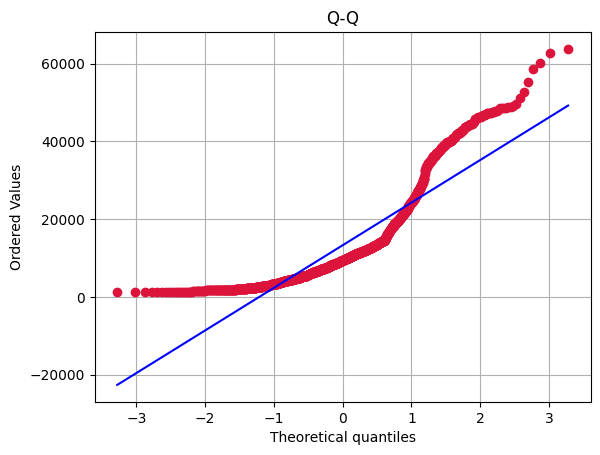

KS-тест BMI: статистика = KstestResult(statistic=1.0, pvalue=0.0, statistic_location=15.96, statistic_sign=-1)
KS-тест Charges: статистика = KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1121.8739, statistic_sign=-1)


In [43]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

bmi = data['bmi']
charges = data['charges']

def Q_Q (data):
    res = stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q')
    plt.gca().get_lines()[0].set_color('crimson')
    plt.gca().get_lines()[1].set_color('blue')
    plt.grid(True)
    plt.show()

Q_Q(bmi)
Q_Q(charges)


ks_stat_bmi = stats.kstest(bmi, 'norm')
print(f'KS-тест BMI: статистика = {ks_stat_bmi}')

ks_stat_charges = stats.kstest(charges, 'norm')
print(f'KS-тест Charges: статистика = {ks_stat_charges}')



9.   Загрузить данные из файла “ECDCCases.csv”
10. Проверить  в  данных  наличие  пропущенных  значений.  Вывести 
количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. 
Для оставшихся признаков обработать  пропуски:  для  категориального  признака  использовать 
заполнение значением по умолчанию (например, «other»), для числового 
признака использовать заполнение медианным значением. Показать, что 
пропусков больше в данных нет

In [24]:
import pandas as pd

data = pd.read_csv("ECDCCases.csv")
# print(data)

#Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
total_values = len(data)
missing_percentage = (missing_values / total_values)*100
print("Процент пропущенных значений по каждому признаку:")
print(missing_percentage)

#Удаление
missing_sorted = missing_percentage.sort_values(ascending=False)
top_missing_columns = missing_sorted.index[:2]
print(f"Удаляем два признака: {top_missing_columns}")
data_cleaned = data.drop(columns=top_missing_columns)

#Разделение признаков на числовые и категориальные
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

#Заполнение медианой
for column in numeric_columns:
    median_value = data_cleaned[column].median()
    data_cleaned[column] = data_cleaned[column].fillna(median_value)


# Заполнение значением 'other'
for column in categorical_columns:
    data_cleaned[column] = data_cleaned[column].fillna('other')


print(data_cleaned.isnull().sum())



Процент пропущенных значений по каждому признаку:
dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64
Удаляем два признака: Index(['Cumulative_number_for_14_days_of_COVID-19_cases_per_1

11. Посмотреть статистику по данным, используя describe(). Сделать выводы 
о том, какие признаки содержат выбросы. Посмотреть, для каких стран 
количество смертей в день превысило 3000 и сколько таких дней было

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  


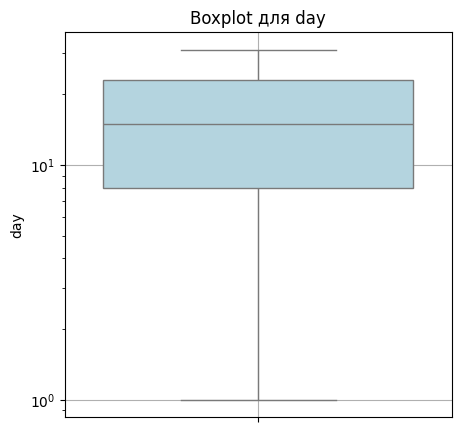

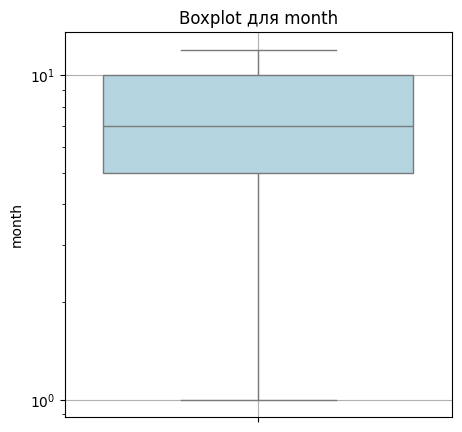

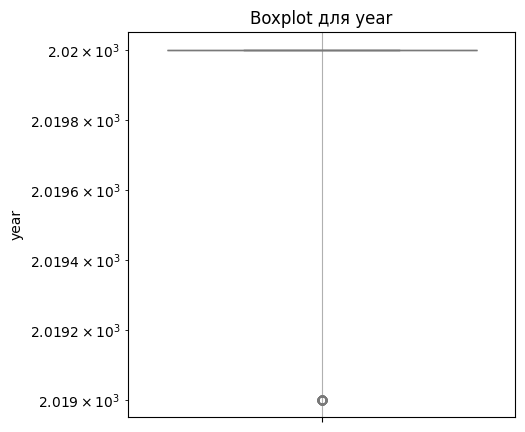

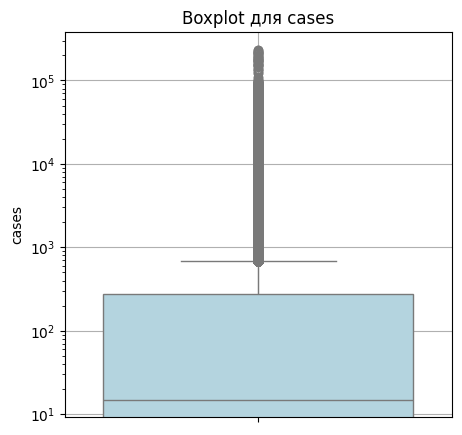

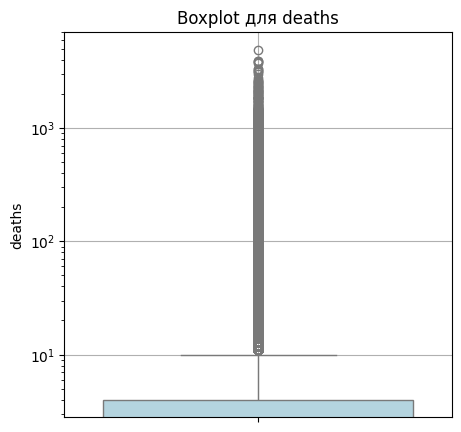

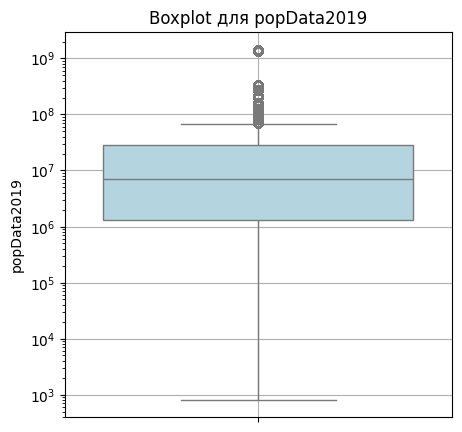

                    country  days_with_deaths_above_3000
0                 Argentina                            1
1                   Ecuador                            1
2                    Mexico                            1
3                      Peru                            2
4  United_States_of_America                            6


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(data_cleaned.describe())

numeric_columns = data_cleaned.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data_cleaned[column], color='lightblue')
    plt.yscale('log')
    plt.title(f'Boxplot для {column}')
    plt.grid(True)
    plt.show()

high_deaths = data_cleaned[data_cleaned['deaths'] > 3000]

countries_with_high_deaths = high_deaths.groupby('countriesAndTerritories')['deaths'].count().reset_index()

countries_with_high_deaths.columns = ['country', 'days_with_deaths_above_3000']

print(countries_with_high_deaths)


12. Найти дублирование данных. Удалить дубликаты.

In [81]:
import pandas as pd

duplicates = data_cleaned[data_cleaned.duplicated()]

print("Дубликаты:")
print(duplicates)

data_cleaned2 = data_cleaned.drop_duplicates()

print("Количество строк до удаления дубликатов:", len(data_cleaned))
print("Количество строк после удаления дубликатов:", len(data_cleaned2))

Дубликаты:
          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
3      12/12/2020   12     12  2020    113      11             Afghanistan   
218    12/05/2020   12      5  2020    285       2             Afghanistan   
48010  29/05/2020   29      5  2020      0       0             Saint_Lucia   
48073  28/03/2020   28      3  2020      0       0             Saint_Lucia   

      countryterritoryCode  popData2019 continentExp  
3                      AFG   38041757.0         Asia  
218                    AFG   38041757.0         Asia  
48010                  LCA     182795.0      America  
48073                  LCA     182795.0      America  
Количество строк до удаления дубликатов: 61904
Количество строк после удаления дубликатов: 61900


13. Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна 
выборка  –  это  индекс  массы  тела  людей  c  региона  northwest,  вторая 
выборка –  это индекс массы тела людей с региона southwest. Сравнить 
средние  значения  этих  выборок,  используя  t-критерий  Стьюдента. 
Предварительно проверить выборки на нормальность (критерий Шопиро-
Уилка) и на гомогенность дисперсии (критерий Бартлетта). 

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sts

data=pd.read_csv("bmi.csv")

bmi_northwest = data[data['region'] == 'northwest']['bmi']
bmi_southwest = data[data['region'] == 'southwest']['bmi']

print("BMI для региона Northwest:", bmi_northwest.head())
print("BMI для региона Southwest:", bmi_southwest.head())

shapiro_north=sts.shapiro(bmi_northwest)
shapiro_southwest=sts.shapiro(bmi_southwest)

print(shapiro_north)
print(shapiro_southwest)
print("-"*40)
# statistic почти равен 1, значит отклонений от гипотетической 
# дисперсии почти нет

bart=sts.bartlett(bmi_northwest, bmi_southwest)
print(bart)
print("-"*40)
# p>0.05 =>выборки принадлежат к разным генеральным совокупностям и их 
# средние значения различны

t_stat, p_value = sts.ttest_ind(bmi_northwest, bmi_southwest)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

BMI для региона Northwest: 0    22.705
1    28.880
2    27.740
3    25.840
4    28.025
Name: bmi, dtype: float64
BMI для региона Southwest: 325    27.9
326    34.4
327    24.6
328    40.3
329    35.3
Name: bmi, dtype: float64
ShapiroResult(statistic=0.995464981663833, pvalue=0.4655897798883668)
ShapiroResult(statistic=0.9949269360950754, pvalue=0.36296471144790743)
----------------------------------------
BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)
----------------------------------------
T-статистика: -3.2844171500398582
P-значение: 0.001076958496307695


14. Кубик бросили 600 раз, получили следующие результаты:
N Количество выпадений 
1 97 
2 98 
3 109 
4 95 
5 97 
6 104 
С  помощью  критерия  Хи-квадрат  проверить,  является  ли  полученное распределение  равномерным.  Использовать  функцию 
scipy.stats.chisquare().

In [8]:
import numpy as np
import scipy.stats as sts

data=[97, 98, 109, 95, 97, 104]

X_sq=sts.chisquare(data)
X_sq
# p значительно больше 0.05 =>выборки принадлежат к разным генеральным совокупностям и их 
# средние значения различны
# данные не показывают существенных отклонений от ожидаемых частот

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

15. С  помощью  критерия  Хи-квадрат  проверить,  являются  ли  переменные зависимыми.  
Создать датафрейм, используя следующий код:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 
                   'Гражданский брак': [80,22,20,35,6,4], 
                    'Не состоит в отношениях': [35,44,35,6,8,22]}) 
data.index  =  ['Полный  рабочий  день','Частичная  занятость','Временно  не 
работает','На домохозяйстве','На пенсии','Учёба']
Использовать функцию scipy.stats.chi2_contingency(). 
Влияет ли семейное положение на занятость?

In [10]:
import pandas as pd
import scipy.stats as sts

data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 
                   'Гражданский брак': [80,22,20,35,6,4], 
                    'Не состоит в отношениях': [35,44,35,6,8,22]}) 
data.index  =  ['Полный  рабочий  день','Частичная  занятость','Временно  не работает',
                'На домохозяйстве','На пенсии','Учёба']

X_sq=sts.chi2_contingency(data)
X_sq
# p>0.05=>выборки принадлежат к разным генеральным совокупностям и их 
# средние значения различны
# statistic долвольно большой=>наблюдаемая выборка сильно отличается
# от ожидаемлй

Chi2ContingencyResult(statistic=122.29654948595365, pvalue=1.7291616900960234e-21, dof=10, expected_freq=array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))